# Лабораторная работа 4

   по теме
                 
   **Распознавание рукописных символов**
   
   ****

   Выполнил студент

   Группы БСТ1801

   Харатишвили Заза

In [35]:
#Импорт бибилиотек и методов
import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [36]:
#Получение данных
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
#train - тренировочные наборы для обучения
#test - контрольный набор для тестирования

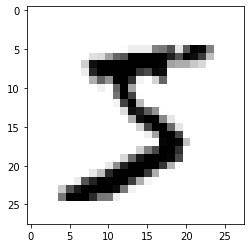

5


In [37]:
#Сравнение текстового изображения с его меткой для проверки корректности
plt.imshow(train_images[0],cmap=plt.cm.binary)
plt.show()
print(train_labels[0])

In [38]:
#Нормализуем входные данные путем преобразования изоображения в массивы в бинарный интервал [0,1] из [0;255]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [39]:
#Закодируем метки категорий - Переведем изображения в унитарный код
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print (test_labels.shape)

(10000, 10)


In [40]:
#Задаем базовую архитектуру сети
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Настраиваем параметры сети
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#Начинаем обучение сети
model.fit(train_images, train_labels, epochs=5, batch_size=128)

#Проверяем как модель распознает тестовый набор
test_loss, test_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)
print('Test data loss:', test_loss)
print('Test data accuracy:', test_accuracy)
#Проверяем как модель распознает контрольный набор
train_loss, train_accuracy = model.evaluate(
    train_images, train_labels, verbose=0)
print('Train data loss:', train_loss)
print('Train data accuracy:', train_accuracy)

Epoch 1/5
469/469 [==============================] - 1s 875us/step - loss: 0.3026 - accuracy: 0.9147
Epoch 2/5
469/469 [==============================] - 0s 868us/step - loss: 0.1320 - accuracy: 0.9618
Epoch 3/5
469/469 [==============================] - 0s 860us/step - loss: 0.0915 - accuracy: 0.9731
Epoch 4/5
469/469 [==============================] - 0s 841us/step - loss: 0.0686 - accuracy: 0.9803
Epoch 5/5
469/469 [==============================] - 0s 846us/step - loss: 0.0538 - accuracy: 0.9840
Test data loss: 0.07652094215154648
Test data accuracy: 0.9768999814987183
Train data loss: 0.039634909480810165
Train data accuracy: 0.989883303642273


Найдем архитектуру сети, точность классификации которой будет не менее 95%.

In [41]:
#Получение данных
mnist = tf.keras.datasets.mnist
(new_train_images, new_train_labels),(new_test_images, new_test_labels) = mnist.load_data()
#train - тренировочные наборы для обучения
#test - контрольный набор для тестирования

In [42]:
#Нормализуем входные данные путем преобразования изоображения в массивы в бинарный интервал [0,1] из [0;255]
new_train_images = new_train_images / 255.0
new_test_images = new_test_images / 255.0

In [43]:
#Закодируем метки категорий - конструирование вектора с нулевыми элементами со значением 1 в
# элементе, индекс которого соответствует индексу метки
#Конвертируем из 1 измерения в 10 измерений
new_train_labels = to_categorical(new_train_labels)
new_test_labels = to_categorical(new_test_labels)
print (test_labels.shape)

(10000, 10)


In [52]:
## Создание массивов для вывода метрик
all_train_images = []
all_mse_histories = []


#Задаем базовую архитектуру сети
model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) #Случайно отключает нейроны в фазе обучения
model.add(Dense(10, activation='softmax'))

#Настраиваем параметры сети
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

#Начинаем обучение сети
history = model.fit(new_train_images, new_train_labels, epochs=5, batch_size=32)

#Проверяем как модель распознает тестовый набор
test_loss, test_accuracy = model.evaluate(
    new_test_images, new_test_labels, verbose=0)
print('Test data loss:', test_loss)
print('Test data accuracy:', test_accuracy)
#Проверяем как модель распознает контрольный набор
train_loss, train_accuracy = model.evaluate(
    new_train_images, new_train_labels, verbose=0)
print('Train data loss:', train_loss)
print('Train data accuracy:', train_accuracy)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2196 - accuracy: 0.9348
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0972 - accuracy: 0.9700
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0707 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0537 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0436 - accuracy: 0.9857
Test data loss: 0.06952299177646637
Test data accuracy: 0.9796000123023987
Train data loss: 0.02395610138773918
Train data accuracy: 0.9923666715621948


Напишем функцию, которая позволит загружать пользовательское изображение не из датасета

In [45]:
#Импорт бибилиотек
import requests
import numpy as np

from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [46]:
#Зададим размеры изображения и получим произведения элементов для reshape
img_size = (28, 28)
img_size_flat = np.prod(img_size)

In [47]:
# Загрузим данные
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

# Переведем данные в формат с плавающей запятой, поскольку они являютстя целыми числами,
#изменим форму матрицы, чтобы она была в одну строку (reshape) и проведем нормализацию, поделив на 255
train_images = train_images.reshape(-1, img_size_flat).astype('float32') / 255
test_images = test_images.reshape(-1, img_size_flat).astype('float32') / 255

# Переведем изображения в унитарный код
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [48]:
#Задаем базовую архитектуру сети
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Настраиваем параметры сети
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

#Начинаем обучение сети
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

#Проверяем как модель распознает тестовый набор
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print('Test data loss:', test_loss)
print('Test data accuracy:', test_accuracy)
#Проверяем как модель распознает контрольный набор
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
print('Train data loss:', train_loss)
print('Train data accuracy:', train_accuracy)

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3065 - accuracy: 0.9151 - val_loss: 0.1617 - val_accuracy: 0.9524
Epoch 2/10
469/469 [==============================] - 0s 1ms/step - loss: 0.1324 - accuracy: 0.9613 - val_loss: 0.1106 - val_accuracy: 0.9670
Epoch 3/10
469/469 [==============================] - 0s 958us/step - loss: 0.0893 - accuracy: 0.9742 - val_loss: 0.0892 - val_accuracy: 0.9726
Epoch 4/10
469/469 [==============================] - 0s 946us/step - loss: 0.0657 - accuracy: 0.9811 - val_loss: 0.0745 - val_accuracy: 0.9774
Epoch 5/10
469/469 [==============================] - 0s 936us/step - loss: 0.0502 - accuracy: 0.9855 - val_loss: 0.0717 - val_accuracy: 0.9779
Epoch 6/10
469/469 [==============================] - 0s 945us/step - loss: 0.0389 - accuracy: 0.9891 - val_loss: 0.0688 - val_accuracy: 0.9793
Epoch 7/10
469/469 [==============================] - 0s 960us/step - loss: 0.0311 - accuracy: 0.9913 - val_loss: 0.0674 - val_accuracy: 0.9

In [49]:
# Функция получения изображения и его преобразования для дальнейшей работы
# url - ссылка на изображение
# target_size - размер изображения, преобразуем до 28х28 пикселей
# convert_to='L' - преобразование цвета изображения на оттенки серого
def get_image(url, target_size=(img_size), convert_to='L'):
    if url.lower().startswith('http'):
        r = requests.get(url)
        url = BytesIO(r.content)
    img = (Image.open(url).convert(convert_to).resize(target_size))
    return np.array(img).reshape(-1, np.prod(target_size))

def predict_digit(img, model):
    return model.predict(img).argmax() 

3


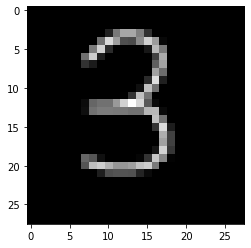

In [50]:
#Загрузим свою картинку и подадим ее на вход обученной модели
img = get_image(r"C:\Users\zazah\sii\lab4\3.png")
#Узнаем предсказание для загруженного нами изображения в уже обученную модель
predict = predict_digit(img, model)
plt.imshow(img.reshape(img_size), cmap='gray')
print(predict)

## Вывод

В результате выполнения лабораторной работы можно сделать вывод, что для задачи анализа изображения наиболее эффективен
анализатор Adam, при использовании других оптимизаторов потери возрастают, а точность снижается. Также была реализована функция, которая выполняет загрузку пользовательского изображения с компьютера пользователя